# Importing Libraries

In [2]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
import pandas as pd
import re

# Loading data

In [5]:
data = pd.read_csv("spamSMS.csv")
data.head()

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


# Data visualization

In [8]:
data.shape

(5574, 2)

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5574 entries, 0 to 5573
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Class       5574 non-null   object
 1   input Text  5574 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [12]:
data.describe()

,Class,input Text
count,5574,5574
unique,2,5171
top,ham,"Sorry, I'll call later"
freq,4827,30


In [14]:
# Get all the ham and spam emails
ham_message = data[data.Class =='ham']
spam_message = data[data.Class=='spam']

In [16]:
ham_message

,Class,input Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
6,ham,Even my brother is not like to speak with me. ...
...,...,...
5567,ham,Huh y lei...
5570,ham,Will √º b going to esplanade fr home?
5571,ham,"Pity, * was in mood for that. So...any other s..."
5572,ham,The guy did some bitching but I acted like i'd...


In [18]:
spam_message

,Class,input Text
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
5,spam,FreeMsg Hey there darling it's been 3 week's n...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...
11,spam,"SIX chances to win CASH! From 100 to 20,000 po..."
...,...,...
5539,spam,Want explicit SEX in 30 secs? Ring 02073162414...
5542,spam,ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
5549,spam,Had your contract mobile 11 Mnths? Latest Moto...
5568,spam,REMINDER FROM O2: To get 2.50 pounds free call...


In [20]:
# Create numpy list to visualize using wordcloud
ham_msg_text = " ".join(ham_message["input Text"].to_numpy().tolist())
spam_msg_text = " ".join(spam_message["input Text"].to_numpy().tolist())

In [22]:
ham_msg_text 

'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat... Ok lar... Joking wif u oni... U dun say so early hor... U c already then say... Nah I don\'t think he goes to usf, he lives around here though Even my brother is not like to speak with me. They treat me like aids patent. As per your request \'Melle Melle (Oru Minnaminunginte Nurungu Vettam)\' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune I\'m gonna be home soon and i don\'t want to talk about this stuff anymore tonight, k? I\'ve cried enough today. I\'ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times. I HAVE A DATE ON SUNDAY WITH WILL!! Oh k...i\'m watching here:) Eh u remember how 2 spell his name... Yes i did. He v naughty make until i v wet. Fine if that¬ís the way u feel. That¬ís the wa

In [24]:
spam_msg_text

'Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C\'s apply 08452810075over18\'s FreeMsg Hey there darling it\'s been 3 week\'s now and no word back! I\'d like some fun you up for it still? Tb ok! XxX std chgs to send, ¬£1.50 to rcv WINNER!! As a valued network customer you have been selected to receivea ¬£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only. Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030 SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info URGENT! You have won a 1 week FREE membership in our ¬£100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18 XXXMobileMovieClub: To use your credit, click the WAP link in the next txt messag

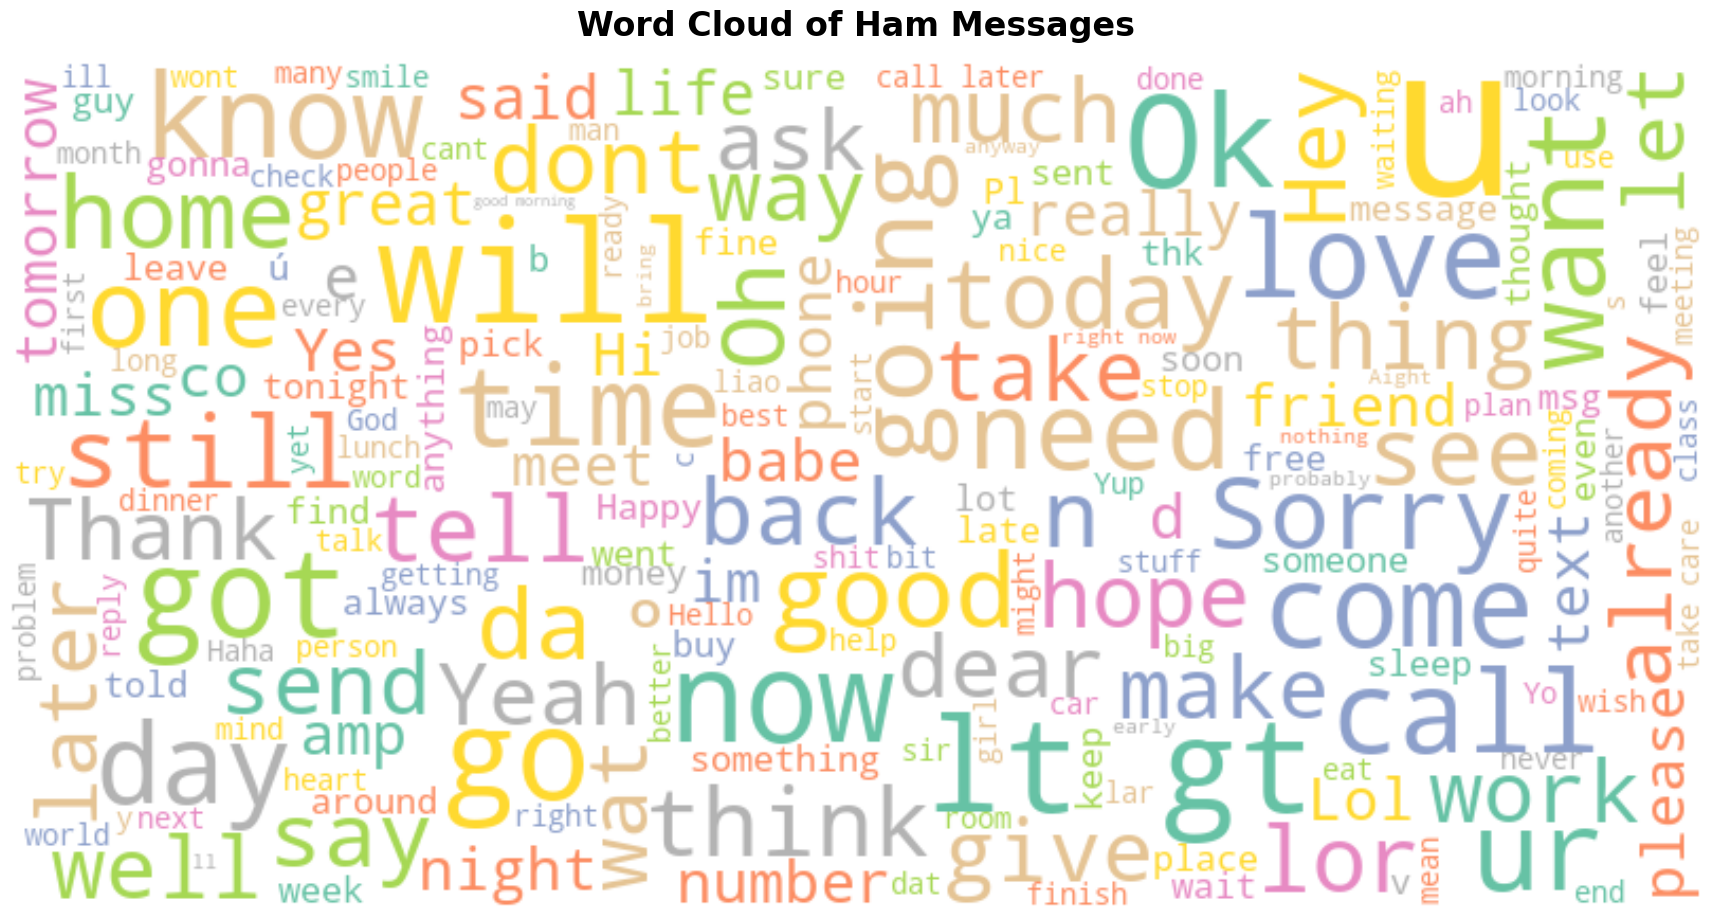

In [26]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
# wordcloud of ham messages
# Generate the word cloud
ham_cloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='Set2',
    stopwords=STOPWORDS,
    max_font_size=100,
    random_state=42
).generate(ham_msg_text)

# Display the word cloud
plt.figure(figsize=(18, 9))
plt.imshow(ham_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Ham Messages", fontsize=24, weight='bold', pad=20)
plt.tight_layout(pad=0)
plt.show()

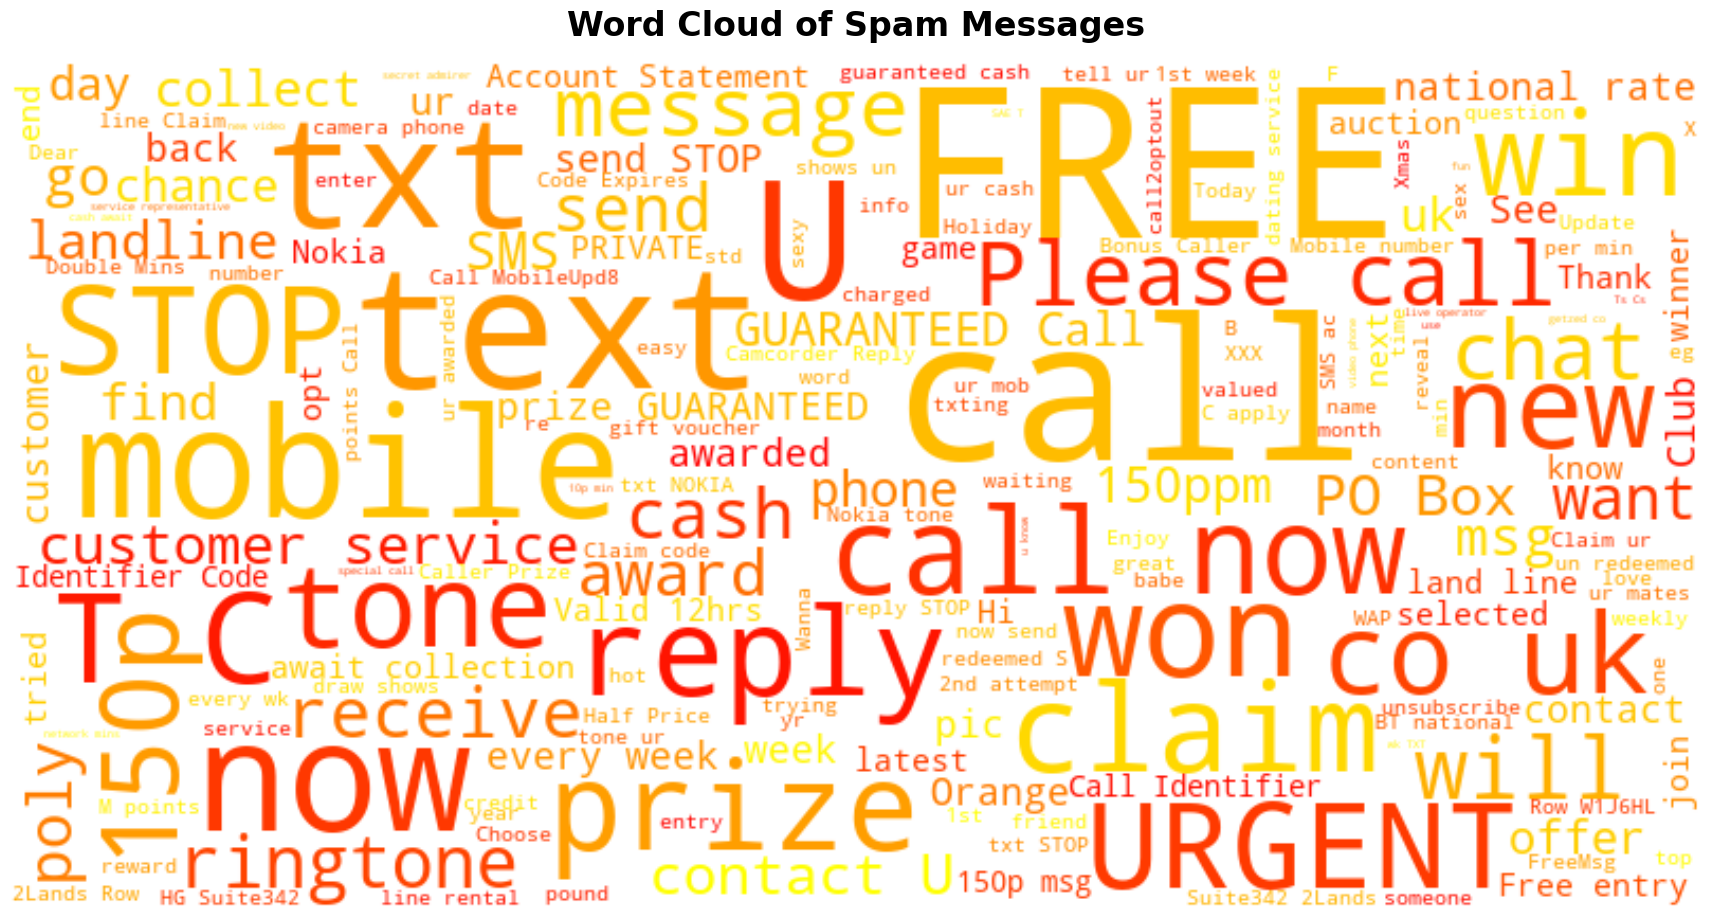

In [27]:
# Generate word cloud for spam messages
spam_cloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    colormap='autumn',
    stopwords=STOPWORDS,
    max_font_size=100,
    random_state=42
).generate(spam_msg_text)

# Display the word cloud
plt.figure(figsize=(18, 9))
plt.imshow(spam_cloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Spam Messages", fontsize=24, weight='bold', pad=20)
plt.tight_layout(pad=0)
plt.show()


C:\Users\harsh\AppData\Local\Temp\ipykernel_24900\1918486795.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.countplot(data=data, x="Class", palette=cols)


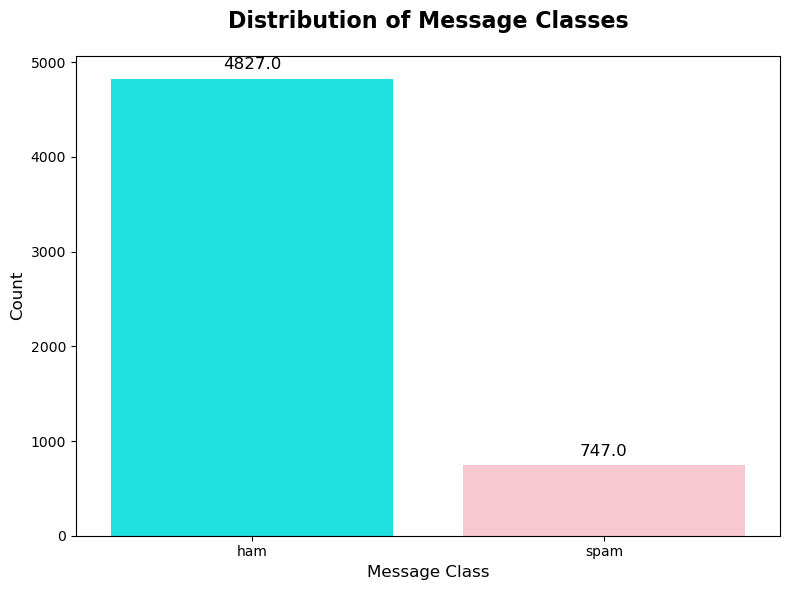

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

# Optional: Replace class values with labels for readability
# data["Class"] = data["Class"].map({0: "Ham", 1: "Spam"})

plt.figure(figsize=(8, 6))
cols = ["#00FFFF", "#FFC0CB"]  # Colour palette (Cyan for Ham, Pink for Spam)
bar = sns.countplot(data=data, x="Class", palette=cols)

# Set labels and title
bar.set_title("Distribution of Message Classes", fontsize=16, weight='bold', pad=20)
bar.set_xlabel("Message Class", fontsize=12)
bar.set_ylabel("Count", fontsize=12)

# Add value labels on top of the bars
for p in bar.patches:
    bar.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                 textcoords='offset points')

plt.tight_layout()
plt.show()


Hence, The data imbalance is quite evident here.

**Sampling**

In [34]:
# one way to fix it is to downsample the ham msg
ham_df = ham_message.sample(n = len(spam_message), random_state = 44)
spam_df = spam_message
print(ham_df.shape, spam_df.shape)

(747, 2) (747, 2)


C:\Users\harsh\AppData\Local\Temp\ipykernel_24900\127515652.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar1 = sns.countplot(x=msg_df["Class"], palette=cols)


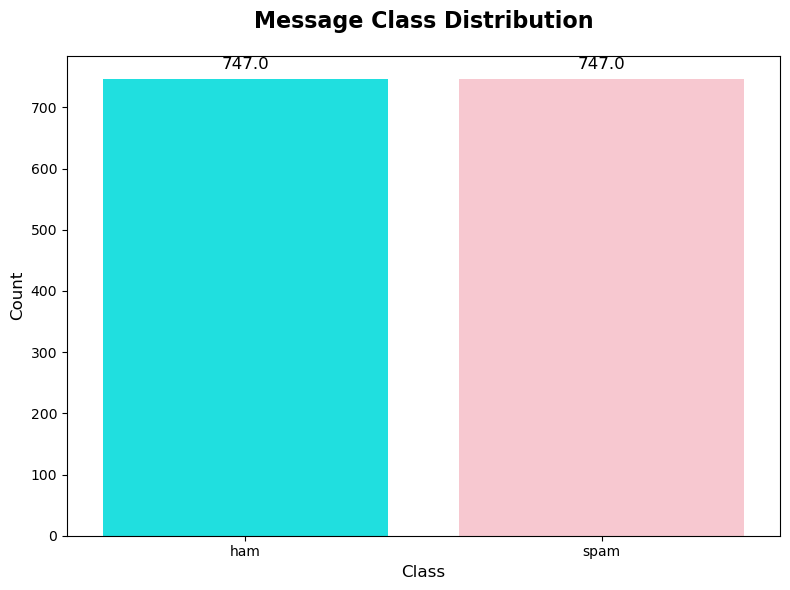

In [36]:
# Combine ham and spam DataFrames (use pd.concat instead of append)
msg_df = pd.concat([ham_df, spam_df], ignore_index=True)

# Plot class distribution
plt.figure(figsize=(8, 6))
cols = ["#00FFFF", "#FFC0CB"]  # Cyan for Ham, Pink for Spam
bar1 = sns.countplot(x=msg_df["Class"], palette=cols)

# Labeling
bar1.set_title("Message Class Distribution", fontsize=16, weight='bold', pad=20)
bar1.set_xlabel("Class", fontsize=12)
bar1.set_ylabel("Count", fontsize=12)

# Add value labels on bars
for p in bar1.patches:
    bar1.annotate(f'{p.get_height()}', 
                  (p.get_x() + p.get_width() / 2., p.get_height()), 
                  ha='center', va='center', fontsize=12, color='black', 
                  xytext=(0, 10), textcoords='offset points')

plt.tight_layout()
plt.show()

**FEATURE ENGINEERING**

**To explore and get to know data better I am creating more features(columns)**
- No_of_Char = Number of characters in the input text
- No_of_Word = Number of words in the input text
- No_of_sen  = Number of sentences in the input text

In [40]:
import nltk
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [41]:
nltk.data.path.append(r"C:\Users\harsh\AppData\Roaming\nltk_data")
nltk.download('punkt', download_dir=r"C:\Users\harsh\AppData\Roaming\nltk_data")

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [42]:
from nltk.tokenize import word_tokenize, sent_tokenize

text = "text"
print("Words:", word_tokenize(text))
print("Sentences:", sent_tokenize(text))


Words: ['text']
Sentences: ['text']


In [46]:
data["No_of_Char"] = data["input Text"].apply(len)
data["No_of_Words"] = data["input Text"].apply(lambda x: len(word_tokenize(x)))
data["No_of_sen"] = data["input Text"].apply(lambda x: len(sent_tokenize(x)))


In [47]:
data.head()

,Class,input Text,No_of_Char,No_of_Words,No_of_sen
0,ham,"Go until jurong point, crazy.. Available only ...",111,24,2
1,ham,Ok lar... Joking wif u oni...,29,8,2
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,ham,U dun say so early hor... U c already then say...,49,13,1
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,15,1


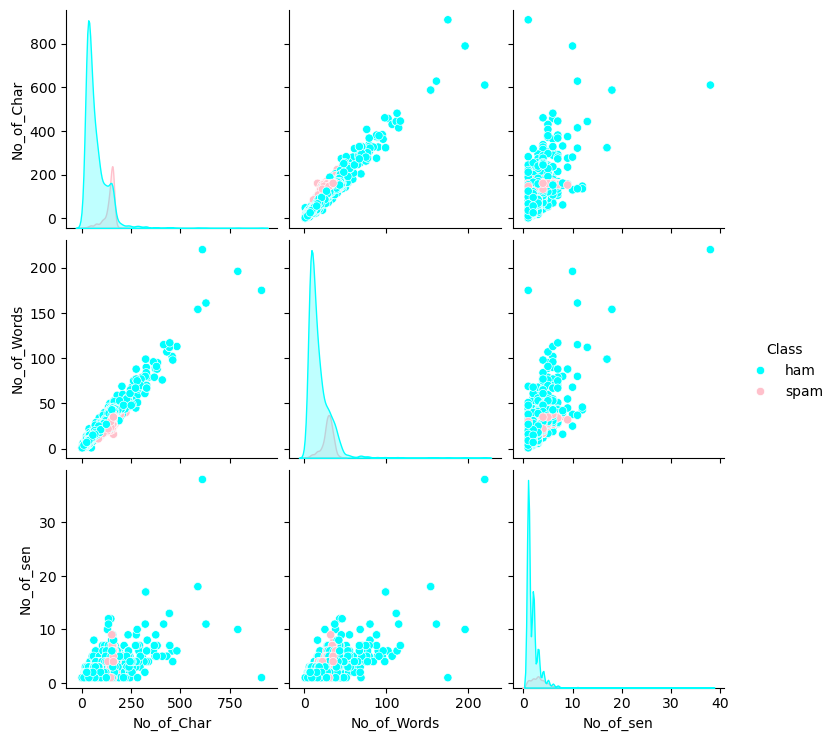

In [50]:
sns.pairplot(data=data, hue="Class",palette=cols)

Here, we can observe few outliners in the class 'Ham'. Hence, we can drop the outliners as they the same thing i.e length of the input text.

# Data Preprocessing

In [54]:
data = data[(data["No_of_Char"]<350)]
data.shape

(5550, 5)

In [56]:
#function to clean input text
def clean_data(inputText):
    text = re.sub('[^a-zA-Z]', ' ', inputText) #Replacing all non-alphabetic characters with a space
    text = text.lower() #converting input to lowercase
    text = text.split()
    text = ' '.join(text)
    return text

In [58]:
#cleaning input text
data["cleaned_text"] = data["input Text"].apply(clean_data)
data["cleaned_text"].head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_24900\1539644974.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["cleaned_text"] = data["input Text"].apply(clean_data)


0    go until jurong point crazy available only in ...
1                              ok lar joking wif u oni
2    free entry in a wkly comp to win fa cup final ...
3          u dun say so early hor u c already then say
4    nah i don t think he goes to usf he lives arou...
Name: cleaned_text, dtype: object

**Here, I replaced all non-alphabetic characters with a space and converted the text to lower case**

In [61]:
#Tokenization
data["Tokenized_Text"]=data.apply(lambda row: nltk.word_tokenize(row["cleaned_text"]), axis=1)
data["Tokenized_Text"].head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_24900\2764974977.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Tokenized_Text"]=data.apply(lambda row: nltk.word_tokenize(row["cleaned_text"]), axis=1)


0    [go, until, jurong, point, crazy, available, o...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, in, a, wkly, comp, to, win, fa, ...
3    [u, dun, say, so, early, hor, u, c, already, t...
4    [nah, i, don, t, think, he, goes, to, usf, he,...
Name: Tokenized_Text, dtype: object

**Here, I split the sentence into words(tokens) to remove stopwords in the next step.**

In [64]:
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')

# Function to remove stopwords
def removing_stopwords(text):
    stop_words = set(stopwords.words("english"))
    filtered_text = [word for word in text if word not in stop_words]
    return filtered_text

# Apply to DataFrame
data["No_stopword_Text"] = data["Tokenized_Text"].apply(removing_stopwords)
data["No_stopword_Text"].head()


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\harsh\AppData\Local\Temp\ipykernel_24900\3609306171.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["No_stopword_Text"] = data["Tokenized_Text"].apply(removing_stopwords)


0    [go, jurong, point, crazy, available, bugis, n...
1                       [ok, lar, joking, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4       [nah, think, goes, usf, lives, around, though]
Name: No_stopword_Text, dtype: object

**Stopwords give meaning to the sentence structure but do not contribute in NLP. so, I removed stopwords from the input text.**

In [67]:
import nltk
from nltk.stem import WordNetLemmatizer

# Download WordNet data if not already done
nltk.download('wordnet')
nltk.download('omw-1.4')  # Optional, improves lemmatization for more languages

# Initialize the lemmatizer
lemmatizer = WordNetLemmatizer()

# Define the lemmatization function
def lemmatization(text):
    lemmas = [lemmatizer.lemmatize(word, pos='v') for word in text]
    return lemmas


[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [69]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\harsh\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [71]:
data["Lemmatized_Text"] = data["No_stopword_Text"].apply(lemmatization)
data["Lemmatized_Text"].head()

C:\Users\harsh\AppData\Local\Temp\ipykernel_24900\2582914760.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Lemmatized_Text"] = data["No_stopword_Text"].apply(lemmatization)


0    [go, jurong, point, crazy, available, bugis, n...
1                         [ok, lar, joke, wif, u, oni]
2    [free, entry, wkly, comp, win, fa, cup, final,...
3        [u, dun, say, early, hor, u, c, already, say]
4          [nah, think, go, usf, live, around, though]
Name: Lemmatized_Text, dtype: object

In [73]:
corpus= []
for i in data["Lemmatized_Text"]:
    msg = ' '.join([row for row in i])
    corpus.append(msg)

In [75]:
corpus[:5]

['go jurong point crazy available bugis n great world la e buffet cine get amore wat',
 'ok lar joke wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf live around though']

In [77]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

In [79]:
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(corpus).toarray()
X.dtype

dtype('float64')

In [81]:
label_encoder = LabelEncoder()
data["Class"] = label_encoder.fit_transform(data["Class"])

C:\Users\harsh\AppData\Local\Temp\ipykernel_24900\1711342699.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Class"] = label_encoder.fit_transform(data["Class"])


# Data Visualization After Preprocessing

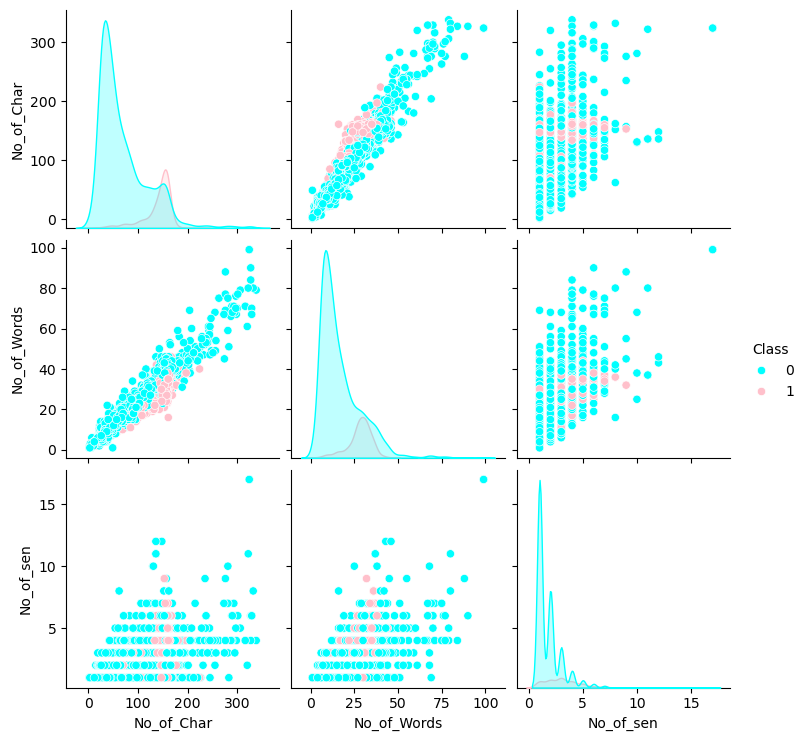

In [84]:
sns.pairplot(data=data, hue="Class",palette=cols)

# Model Building

In [87]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay


In [89]:
# Splitting the testing and training datasets
y = data["Class"] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [91]:
precision =[]
recall =[]
f1_score = []
trainset_accuracy = []
testset_accuracy = []

**Multinomial Naive Bayes**

In [94]:
Multinomia = MultinomialNB()
Multinomia.fit(X_train, y_train)
Multinomia_score = cross_val_score(Multinomia, X_train,y_train,scoring="accuracy", cv=10)
Multinomia_score

array([0.96915167, 0.96143959, 0.96401028, 0.96915167, 0.9562982 ,
       0.97680412, 0.95876289, 0.93814433, 0.96391753, 0.96134021])

In [96]:
Multinomia_score.mean()

0.9619020486046695

In [98]:
Multinomia_pred_train = Multinomia.predict(X_train)
Multinomia_pred_test = Multinomia.predict(X_test)
Multinomia_pred = metrics.precision_score(y_test, Multinomia_pred_test)
Multinomia_pred

1.0

In [100]:
Multinomia_recal = metrics.recall_score(y_test, Multinomia_pred_test)
Multinomia_recal

0.7296137339055794

In [102]:
Multinomia_f1_s = metrics.f1_score(y_test, Multinomia_pred_test)
Multinomia_f1_s

0.8436724565756824

In [104]:
Multinomia_train_accuracy = Multinomia.score(X_train,y_train)
Multinomia_train_accuracy

0.9745173745173745

In [106]:
Multinomia_test_accuracy = Multinomia.score(X_test,y_test)
Multinomia_test_accuracy

0.9621621621621622

In [108]:
precision.append(Multinomia_pred)
recall.append(Multinomia_recal)
f1_score.append(Multinomia_f1_s)
trainset_accuracy.append(Multinomia_train_accuracy)
testset_accuracy.append(Multinomia_test_accuracy)

**KNN**

In [111]:
KNC = KNeighborsClassifier()
KNC.fit(X_train, y_train)
KNC_score = cross_val_score(KNC, X_train,y_train,scoring="accuracy", cv=10)
KNC_score

C:\Users\harsh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\harsh\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\harsh\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\harsh\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\harsh\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

array([0.89974293, 0.90488432, 0.91002571, 0.9125964 , 0.89974293,
       0.90979381, 0.90463918, 0.89690722, 0.92010309, 0.92525773])

In [112]:
KNC_score.mean()

0.9083693318845573

In [115]:
KNC_pred_train = KNC.predict(X_train)
KNC_pred_test = KNC.predict(X_test)
KNC_pred = metrics.precision_score(y_test, KNC_pred_test)
KNC_pred

1.0

In [117]:
KNC_recal = metrics.recall_score(y_test, KNC_pred_test)
KNC_recal

0.3218884120171674

In [119]:
KNC_f1_s = metrics.f1_score(y_test, KNC_pred_test)
KNC_f1_s

0.487012987012987

In [121]:
KNC_train_accuracy = KNC.score(X_train,y_train)
KNC_train_accuracy

0.923037323037323

In [123]:
KNC_test_accuracy = KNC.score(X_test,y_test)
KNC_test_accuracy

0.9051051051051051

In [125]:
precision.append(KNC_pred)
recall.append(KNC_recal)
f1_score.append(KNC_f1_s)
trainset_accuracy.append(KNC_train_accuracy)
testset_accuracy.append(KNC_test_accuracy)

**SVM**

In [128]:
SVM = SVC(probability=False)
SVM.fit(X_train, y_train)

SVC()

In [129]:
from sklearn.svm import LinearSVC

SVM = LinearSVC()
SVM_score = cross_val_score(SVM, X_train, y_train, scoring="accuracy", cv=5)
print(SVM_score)


[0.97297297 0.97554698 0.98970399 0.96653797 0.97812098]


In [132]:
SVM_score.mean()

0.9765765765765767

In [134]:
print(set(y_test))

{0, 1}


In [136]:
#SVM_pred_train = SVM.predict(X_train)
#SVM_pred_test = SVM.predict(X_test)
#SVM_pred = metrics.precision_score(y_test, SVM_pred_test)
#SVM_pred

from sklearn import metrics
# Train the model first
SVM.fit(X_train, y_train)

# Make predictions
SVM_pred_test = SVM.predict(X_test)
SVM_pred_train = SVM.predict(X_train)

# Calculate and print precision for test set
SVM_precision = metrics.precision_score(y_test, SVM_pred_test, average='binary')
print("Test Precision:", SVM_precision)

# Calculate and print precision for training set
SVM_train_precision = metrics.precision_score(y_train, SVM_pred_train, average='binary')
print("Training Precision:", SVM_train_precision)

Test Precision: 0.9902439024390244
Training Precision: 0.9980506822612085


In [138]:
SVM_recal = metrics.recall_score(y_test, SVM_pred_test)
SVM_recal

0.871244635193133

In [140]:
SVM_f1_s = metrics.f1_score(y_test, SVM_pred_test)
SVM_f1_s

0.9269406392694064

In [142]:
# Create and fit the model
SVM = LinearSVC()
SVM.fit(X_train, y_train)

# safely evaluate accuracy
SVM_train_accuracy = SVM.score(X_train, y_train)
print("Training Accuracy:", SVM_train_accuracy)


Training Accuracy: 0.9992277992277993


In [144]:
SVM_test_accuracy = SVM.score(X_test,y_test)
SVM_test_accuracy

0.9807807807807808

In [146]:
precision.append(SVM_precision)
recall.append(SVM_recal)
f1_score.append(SVM_f1_s)
trainset_accuracy.append(SVM_train_accuracy)
testset_accuracy.append(SVM_test_accuracy)

**Random Forest**

In [149]:
RFC=RandomForestClassifier()
RFC.fit(X_train, y_train)
RFC_score = cross_val_score(RFC, X_train, y_train, scoring="accuracy", cv=5, n_jobs=-1)
RFC_score

array([0.96653797, 0.97554698, 0.97683398, 0.96396396, 0.97425997])

In [150]:
RFC_score.mean()

0.9714285714285713

In [151]:
RFC_pred_train = RFC.predict(X_train)
RFC_pred_test = RFC.predict(X_test)
RFC_pred = metrics.precision_score(y_test, RFC_pred_test)
RFC_pred

1.0

In [152]:
RFC_recal = metrics.recall_score(y_test, RFC_pred_test)
RFC_recal

0.8497854077253219

In [157]:
RFC_f1_s = metrics.f1_score(y_test, RFC_pred_test)
RFC_f1_s

0.9187935034802784

In [159]:
RFC_train_accuracy = RFC.score(X_train,y_train)
RFC_train_accuracy

1.0

In [160]:
RFC_test_accuracy = RFC.score(X_test,y_test)
RFC_test_accuracy

0.978978978978979

In [161]:
precision.append(RFC_pred)
recall.append(RFC_recal)
f1_score.append(RFC_f1_s)
trainset_accuracy.append(RFC_train_accuracy)
testset_accuracy.append(RFC_test_accuracy)

# Confusion Matrix

In [166]:
from matplotlib.colors import ListedColormap
cmap2 = ListedColormap(["#00FFFF","#FFC0CB"])

**Confusion Matrix of Multinomial Naive Bayes Model**

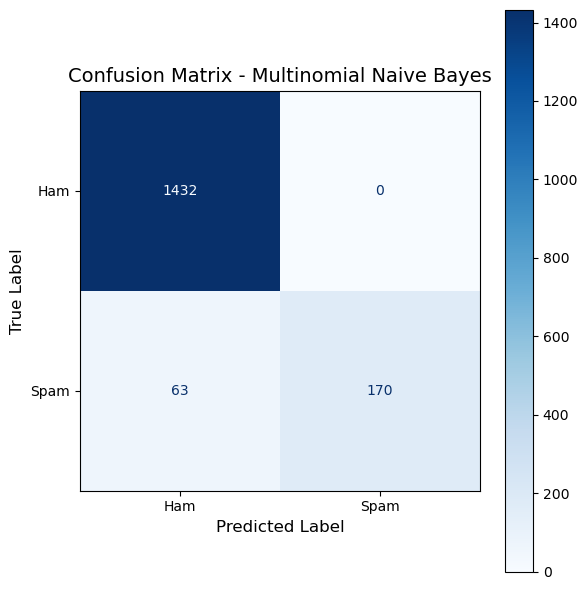

In [169]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

# Generate confusion matrix
Multinomia_confusion_matrix = confusion_matrix(y_test, Multinomia_pred_test)

# Create display object
Multinomia_display = ConfusionMatrixDisplay(confusion_matrix=Multinomia_confusion_matrix,
                                            display_labels=["Ham", "Spam"])

# Plot with enhancements
fig, ax = plt.subplots(figsize=(6, 6))
Multinomia_display.plot(cmap='Blues', ax=ax, colorbar=True)

# Customize the plot
plt.title("Confusion Matrix - Multinomial Naive Bayes", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False) 
plt.tight_layout()
plt.show()


**Confusion Matrix of KNN Model**

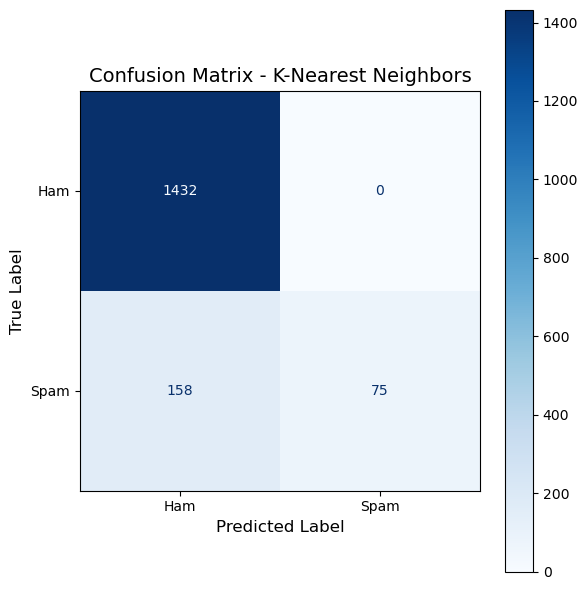

In [172]:
# Generate confusion matrix
KNC_confusion_matrix = confusion_matrix(y_test, KNC_pred_test)

# Create display object
KNC_display = ConfusionMatrixDisplay(confusion_matrix=KNC_confusion_matrix,
                                     display_labels=["Ham", "Spam"])

# Plot the confusion matrix with enhancements
fig, ax = plt.subplots(figsize=(6, 6))  # Bigger and square plot
KNC_display.plot(cmap='Blues', ax=ax, colorbar=True)

# Add title and axis labels
plt.title("Confusion Matrix - K-Nearest Neighbors", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)

# Optional: remove grid for cleaner look
plt.grid(False)

# Tight layout for better spacing
plt.tight_layout()
plt.show()


**Confusion Matrix of SVM Model**

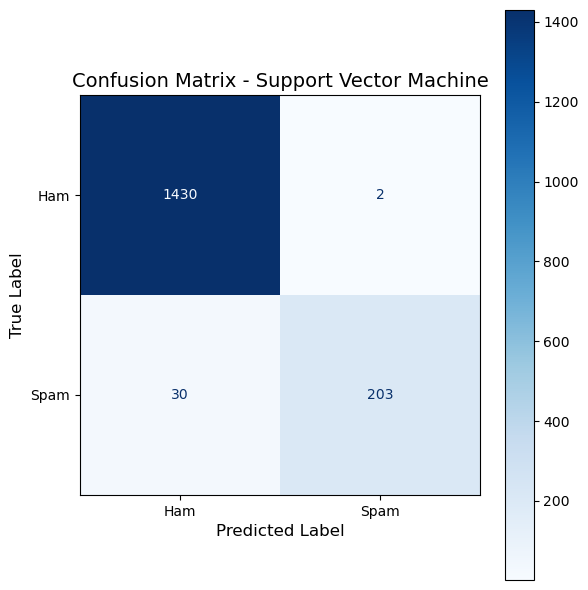

In [175]:
SVM_confusion_matrix = metrics.confusion_matrix(y_test, SVM_pred_test)
SVM_display = ConfusionMatrixDisplay(SVM_confusion_matrix,display_labels=["Ham","Spam"])
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(6, 6))
SVM_display.plot(cmap='Blues', ax=ax, colorbar=True)

# Enhance the plot with titles and labels
plt.title("Confusion Matrix - Support Vector Machine", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


**Confusion Matrix of Random Forest Model**

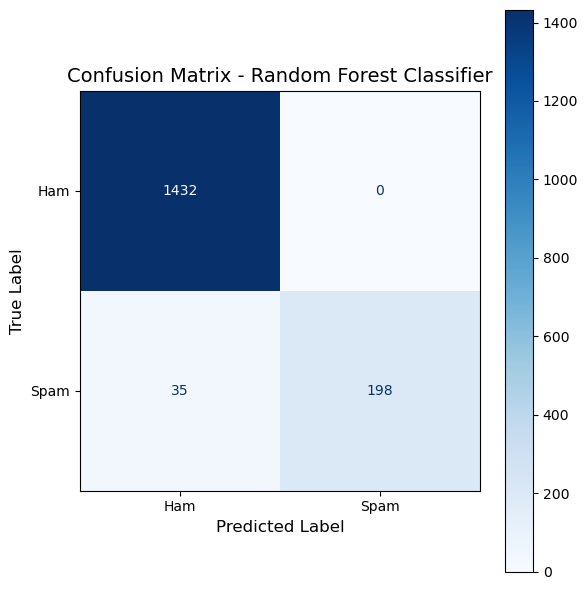

In [178]:
RFC_confusion_matrix = metrics.confusion_matrix(y_test, RFC_pred_test)
RFC_display = ConfusionMatrixDisplay(RFC_confusion_matrix,display_labels=["Ham","Spam"])
# Plot the matrix with styling
fig, ax = plt.subplots(figsize=(6, 6))
RFC_display.plot(cmap='Blues', ax=ax, colorbar=True)  # replace 'Blues' with cmap2 if defined

# Improve visual quality
plt.title("Confusion Matrix - Random Forest Classifier", fontsize=14)
plt.xlabel("Predicted Label", fontsize=12)
plt.ylabel("True Label", fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()

# EVALUATING MODELS

In [181]:
data = {'Precision':precision,
'Recall':recall,
'F1score':f1_score,
'Accuracy on Testset':testset_accuracy,
'Accuracy on Trainset':trainset_accuracy}
Results = pd.DataFrame(data, index =["NaiveBayes", "KNeighbours","SVC","RFC"])

In [183]:
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display

# Sample performance metrics (placeholders for demonstration)
precision = [1.000000, 1.000000, 0.990244, 1.000000]
recall = [0.729614, 0.321888, 0.871245, 0.854077]
f1_score = [0.843672, 0.487013, 0.926941, 0.921296]
testset_accuracy = [0.962162, 0.905105, 0.980781, 0.979580]
trainset_accuracy = [0.974517, 0.923037, 0.999228, 1.000000]

# Create DataFrame
data = {
    'Precision': precision,
    'Recall': recall,
    'F1score': f1_score,
    'Accuracy on Testset': testset_accuracy,
    'Accuracy on Trainset': trainset_accuracy
}
Results = pd.DataFrame(data, index=["NaiveBayes", "KNeighbours", "SVC", "RFC"])

# Create custom colormap matching your image (light cyan to pink)
custom_cmap = LinearSegmentedColormap.from_list("custom_cmap", ["cyan", "pink"])

# Apply the style (for export or visualization)
styled_results = Results.style.background_gradient(cmap=custom_cmap)

display(Results.style.background_gradient(cmap=custom_cmap))

,Precision,Recall,F1score,Accuracy on Testset,Accuracy on Trainset
NaiveBayes,1.000000,0.729614,0.843672,0.962162,0.974517
KNeighbours,1.000000,0.321888,0.487013,0.905105,0.923037
SVC,0.990244,0.871245,0.926941,0.980781,0.999228
RFC,1.000000,0.854077,0.921296,0.979580,1.000000


# ROC Curves

ROC Curve for Naive Bayes:


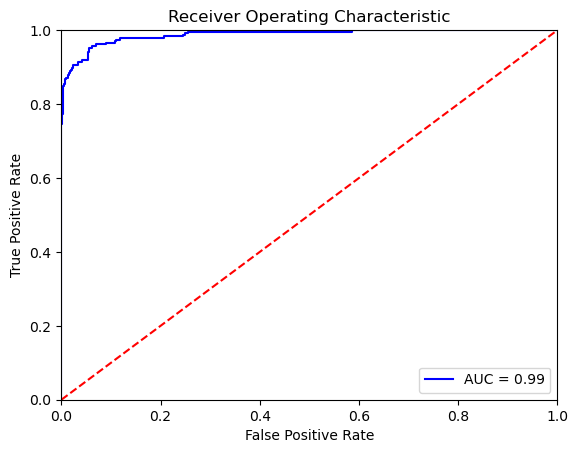

In [186]:
Multinomia_pred = Multinomia.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, Multinomia_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for Naive Bayes:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

ROC Curve for KNeibhours Classifier:


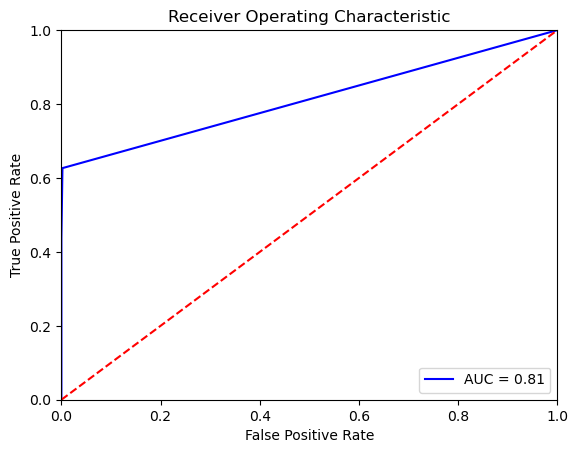

In [188]:
KNC_pred = KNC.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, KNC_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for KNeibhours Classifier:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

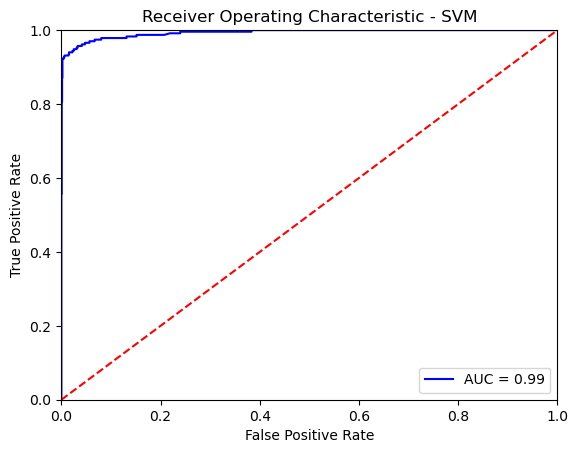

In [189]:
SVM_scores = SVM.decision_function(X_test)  
fpr, tpr, threshold = metrics.roc_curve(y_test, SVM_scores)
roc_auc = metrics.auc(fpr, tpr)

# Plot the ROC curve
plt.figure()
plt.title('Receiver Operating Characteristic - SVM')
plt.plot(fpr, tpr, 'b', label='AUC = %0.2f' % roc_auc)
plt.plot([0, 1], [0, 1], 'r--')  # diagonal line
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc='lower right')
plt.show()


ROC Curve for RFC Classifier:


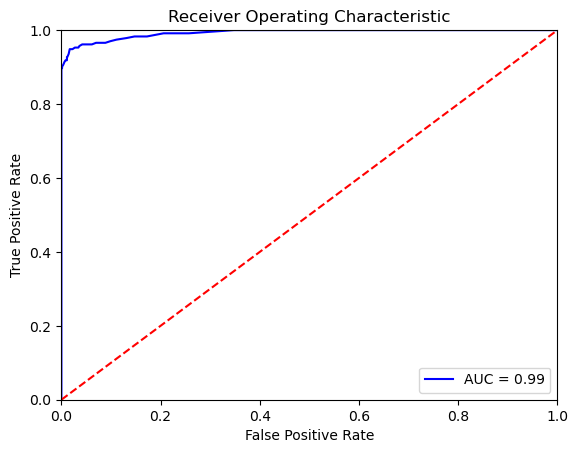

In [190]:
RFC_pred = RFC.predict_proba(X_test)[:, 1]
fpr, tpr, threshold = metrics.roc_curve(y_test, RFC_pred)
roc_auc = metrics.auc(fpr, tpr)
print("ROC Curve for RFC Classifier:")
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

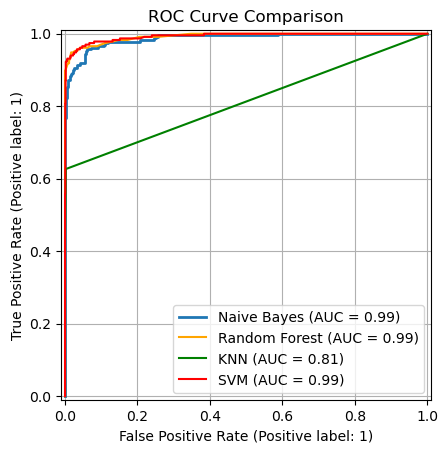

In [191]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
RocCurveDisplay.from_estimator(Multinomia, X_test, y_test, ax=ax, name="Naive Bayes", linewidth=2)
RocCurveDisplay.from_estimator(RFC, X_test, y_test, ax=ax, name="Random Forest", color='orange')
RocCurveDisplay.from_estimator(KNC, X_test, y_test, ax=ax, name="KNN", color='green')
RocCurveDisplay.from_estimator(SVM, X_test, y_test, ax=ax, name="SVM", color='red')
plt.title("ROC Curve Comparison")
plt.grid(True)
plt.show()
